# Electron Spin Resonance
#### Author: Ayush Pandhi (1003227457)
#### Due Date: November 1, 2018

In [51]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Defining a linear fit
def f(x, a, b):
    return a*x + b

In [52]:
#Loading the data for each of the three coils
dbcoil_current = np.loadtxt('double coil data.txt', skiprows=2, usecols=(0,))
dbcoil_freq = 1000*np.loadtxt('double coil data.txt', skiprows=2, usecols=(1,))
longcoil_current = np.loadtxt('long coil data.txt', skiprows=2, usecols=(0,))
longcoil_freq = 1000*np.loadtxt('long coil data.txt', skiprows=2, usecols=(1,))
shortcoil_current = np.loadtxt('short coil data.txt', skiprows=2, usecols=(0,))
shortcoil_freq = 1000*np.loadtxt('short coil data.txt', skiprows=2, usecols=(1,))


#Finding max of precision and accuracy error for dbcoil
dbcoil_ierror = np.empty(len(dbcoil_current))
for i in range(len(dbcoil_current)):
    dbcoil_ierror[i] = max(dbcoil_current[i]*0.0075, 0.1/1000)

dbcoil_freqerror = np.empty(len(dbcoil_freq))
for i in range(len(dbcoil_freq)):
    dbcoil_freqerror[i] = dbcoil_freq[i]*0.00001

#Finding max of precision and accuracy error for dbcoil
longcoil_ierror = np.empty(len(longcoil_current))
for i in range(len(longcoil_current)):
    longcoil_ierror[i] = max(longcoil_current[i]*0.0075, 0.1/1000)

longcoil_freqerror = np.empty(len(longcoil_freq))
for i in range(len(longcoil_freq)):
    longcoil_freqerror[i] = longcoil_freq[i]*0.00001

#Finding max of precision and accuracy error for dbcoil
shortcoil_ierror = np.empty(len(shortcoil_current))
for i in range(len(shortcoil_current)):
    shortcoil_ierror[i] = max(shortcoil_current[i]*0.0075, 0.1/1000)

shortcoil_freqerror = np.empty(len(shortcoil_freq))
for i in range(len(shortcoil_freq)):
    shortcoil_freqerror[i] = shortcoil_freq[i]*0.00001
    
    
#Field generated by the double coil
B_dbcoil = []
for i in dbcoil_current:
    B_dbcoil.append(((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(320)*(1/0.07)*(i))

#Field generated by the long coil
B_longcoil = []
for i in longcoil_current:
    B_longcoil.append(((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(320)*(1/0.07)*(i))

#Field generated by the short coil
B_shortcoil = []
for i in shortcoil_current:
    B_shortcoil.append(((4/5)**(3/2))*(4*(np.pi)*10**(-7))*(320)*(1/0.07)*(i))

    
#Gamma compted for each B
gamma_dbcoil = []
for i in range(len(B_dbcoil)):
    gamma_dbcoil.append(((2*np.pi)*(dbcoil_freq[i]))/(B_dbcoil[i]))

gamma_longcoil = []
for i in range(len(B_longcoil)):
    gamma_longcoil.append(((2*np.pi)*(longcoil_freq[i]))/(B_longcoil[i]))
    
gamma_shortcoil = []
for i in range(len(B_shortcoil)):
    gamma_shortcoil.append(((2*np.pi)*(shortcoil_freq[i]))/(B_shortcoil[i]))
    
    
#Delta E for each gamma
delE_dbcoil = []
for i in range(len(gamma_dbcoil)):
    delE_dbcoil.append((1.0545718*10**(-34))*(gamma_dbcoil[i])*(B_dbcoil[i]))
    
delE_longcoil = []
for i in range(len(gamma_longcoil)):
    delE_longcoil.append((1.0545718*10**(-34))*(gamma_longcoil[i])*(B_longcoil[i]))
    
delE_shortcoil = []
for i in range(len(gamma_shortcoil)):
    delE_shortcoil.append((1.0545718*10**(-34))*(gamma_shortcoil[i])*(B_shortcoil[i]))
    

#Lande g factor for each gamma
g_dbcoil = []
for i in range(len(gamma_dbcoil)):
    g_dbcoil.append((gamma_dbcoil[i])/((4.80320425*10**(-10))/(9.10938356*10**(-31))))

g_longcoil = []
for i in range(len(gamma_longcoil)):
    g_longcoil.append((gamma_longcoil[i])/((4.80320425*10**(-10))/(9.10938356*10**(-31))))
    
g_shortcoil = []
for i in range(len(gamma_shortcoil)):
    g_shortcoil.append((gamma_shortcoil[i])/((4.80320425*10**(-10))/(9.10938356*10**(-31))))

chi squared for linear regression is 8471978.411400346


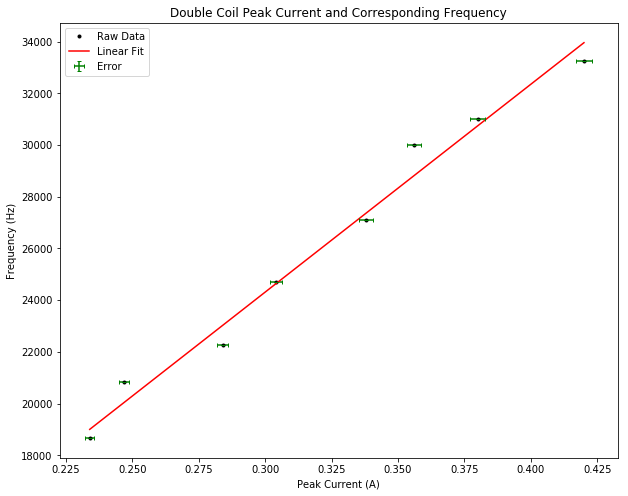

In [56]:
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, dbcoil_current, dbcoil_freq, (0, 0), dbcoil_freqerror, True) 
lin_output = f(dbcoil_current, p_opt_1[0], p_opt_1[1])

#Calculating chi squared
chi_sq_1 = (1/6)*(np.sum(((dbcoil_freq - lin_output) / dbcoil_freqerror)**2))
print('chi squared for linear regression is', chi_sq_1)

#Double coil plot
plt.figure(figsize=(10,8))
plt.plot(dbcoil_current, dbcoil_freq, 'k.', label='Raw Data')
plt.plot(dbcoil_current, lin_output, 'r-', label='Linear Fit')
plt.title('Double Coil Peak Current and Corresponding Frequency')
plt.xlabel('Peak Current (A)')
plt.ylabel('Frequency (Hz)')
plt.errorbar(dbcoil_current, dbcoil_freq, xerr=dbcoil_ierror, yerr=dbcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

chi squared for linear regression is 980787.0871537686


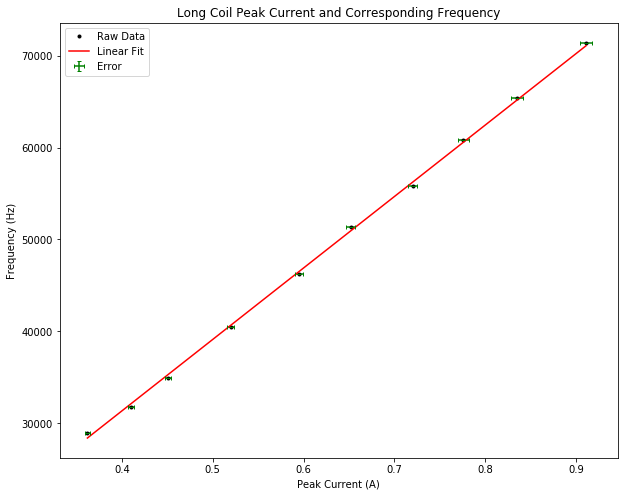

In [59]:
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, longcoil_current, longcoil_freq, (0, 0), longcoil_freqerror, True) 
lin_output = f(longcoil_current, p_opt_1[0], p_opt_1[1])

#Calculating chi squared
chi_sq_1 = (1/8)*(np.sum(((longcoil_freq - lin_output) / longcoil_freqerror)**2))
print('chi squared for linear regression is', chi_sq_1)

#Long coil plot
plt.figure(figsize=(10,8))
plt.plot(longcoil_current, longcoil_freq, 'k.', label='Raw Data')
plt.plot(longcoil_current, lin_output, 'r-', label='Linear Fit')
plt.title('Long Coil Peak Current and Corresponding Frequency')
plt.xlabel('Peak Current (A)')
plt.ylabel('Frequency (Hz)')
plt.errorbar(longcoil_current, longcoil_freq, xerr=longcoil_ierror, yerr=longcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

chi squared for linear regression is 75078.7631861083


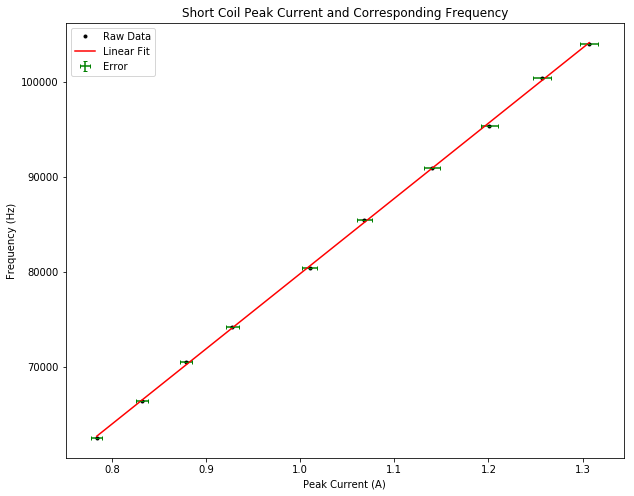

In [60]:
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, shortcoil_current, shortcoil_freq, (0, 0), shortcoil_freqerror, True) 
lin_output = f(shortcoil_current, p_opt_1[0], p_opt_1[1])

#Calculating chi squared
chi_sq_1 = (1/8)*(np.sum(((shortcoil_freq - lin_output) / shortcoil_freqerror)**2))
print('chi squared for linear regression is', chi_sq_1)

#Long coil plot
plt.figure(figsize=(10,8))
plt.plot(shortcoil_current, shortcoil_freq, 'k.', label='Raw Data')
plt.plot(shortcoil_current, lin_output, 'r-', label='Linear Fit')
plt.title('Short Coil Peak Current and Corresponding Frequency')
plt.xlabel('Peak Current (A)')
plt.ylabel('Frequency (Hz)')
plt.errorbar(shortcoil_current, shortcoil_freq, xerr=shortcoil_ierror, yerr=shortcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

In [45]:
print(np.mean(g_dbcoil))
print(np.mean(g_longcoil))
print(np.mean(g_shortcoil))

2.3514578385076954e-13
2.266727692911694e-13
2.3136056243311263e-13


### -----------------------------------------------------IGNORE ANYTHING BELOW THIS LINE----------------------------------------------------

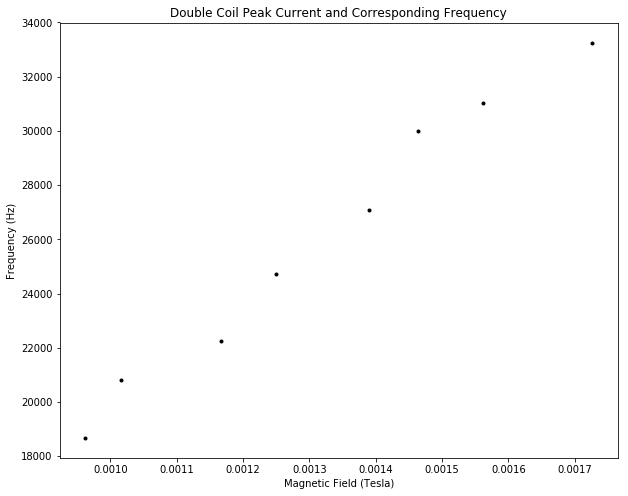

In [50]:
#Linear regression G437
p_opt_1, p_cov_1 = curve_fit(f, B_dbcoil, dbcoil_freq, (0, 0), """ERROR HERE""" , True) 
lin_output = f(B_dbcoil, p_opt_1[0], p_opt_1[1])

#Plotting to check if equation 8 is linear
plt.figure(figsize=(10,8))
plt.plot(B_dbcoil, dbcoil_freq, 'k.', label='Raw Data')
plt.plot(B_dbcoil, lin_output, 'r-', label='Linear Fit')
plt.title('Double Coil Peak Current and Corresponding Frequency')
plt.xlabel('Magnetic Field (Tesla)')
plt.ylabel('Frequency (Hz)')
plt.errorbar(B_dbcoil, dbcoil_freq, xerr="""ERROR HERE""", yerr=dbcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.show()

In [48]:
#Linear regression G437
p_opt_1, p_cov_1 = curve_fit(f, B_shortcoil, shortcoil_freq, (0, 0), """ERROR HERE""" , True) 
lin_output = f(B_shortcoil, p_opt_1[0], p_opt_1[1])

#Plotting to check if equation 8 is linear
plt.figure(figsize=(10,8))
plt.plot(B_shortcoil, shortcoil_freq, 'k.', label='Raw Data')
plt.plot(B_shortcoil, lin_output, 'r-', label='Linear Fit')
plt.title('Double Coil Peak Current and Corresponding Frequency')
plt.xlabel('Magnetic Field (Tesla)')
plt.ylabel('Frequency (Hz)')
plt.errorbar(B_shortcoil, shortcoil_freq, xerr="""ERROR HERE""", yerr=shortcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.show()

[0.001726418468300569, 0.001561997661795753, 0.0014633451778928632, 0.0013893558149656962, 0.0012495981294366025, 0.0011673877261841944, 0.0010152984801672395, 0.0009618617180531743]
[33254. 31018. 29986. 27094. 24704. 22254. 20827. 18668.]


In [ ]:
#Linear regression G437
p_opt_1, p_cov_1 = curve_fit(f, B_longcoil, longcoil_freq, (0, 0), """ERROR HERE""" , True) 
lin_output = f(B_longcoil, p_opt_1[0], p_opt_1[1])

#Plotting to check if equation 8 is linear
plt.figure(figsize=(10,8))
plt.plot(B_longcoil, longcoil_freq, 'k.', label='Raw Data')
plt.plot(B_longcoil, lin_output, 'r-', label='Linear Fit')
plt.title('Double Coil Peak Current and Corresponding Frequency')
plt.xlabel('Magnetic Field (Tesla)')
plt.ylabel('Frequency (Hz)')
plt.errorbar(B_longcoil, longcoil_freq, xerr="""ERROR HERE""", yerr=longcoil_freqerror, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.show()